In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
array = [[1, 2, 3], [4, 5, 6]]
array1 = np.array(array)
print('array type {}'.format(type(array1)))
print('array shape {}'.format(np.shape(array1)))

array type <class 'numpy.ndarray'>
array shape (2, 3)


In [6]:
import torch

tensor = torch.Tensor(array)
print('array type {}'.format(tensor.type))
print('array shape {}'.format(tensor.shape))

array type <built-in method type of Tensor object at 0x7eff94507a00>
array shape torch.Size([2, 3])


In [11]:
print('numpy {} \n'.format(np.ones((2, 3))))
print(torch.ones((2, 3)))

numpy [[1. 1. 1.]
 [1. 1. 1.]] 

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [12]:
print('numpy {}\n'.format(np.random.rand(2,3)))
print(torch.rand(2,3))

numpy [[0.09699057 0.55977746 0.87204326]
 [0.50672725 0.62834988 0.43565768]]

tensor([[0.4836, 0.3954, 0.0406],
        [0.7454, 0.5111, 0.8593]])


In [13]:
# random numpy array
array = np.random.rand(2, 2)
print('{} {}\n'.format(type(array), array))

<class 'numpy.ndarray'> [[0.75682595 0.99570865]
 [0.11536178 0.3459202 ]]



In [17]:
# numpy -> tensor
from_numpy_to_tensor = torch.from_numpy(array)
print('{}\n'.format(from_numpy_to_tensor))

tensor([[0.7568, 0.9957],
        [0.1154, 0.3459]], dtype=torch.float64)



In [19]:
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print('{} {}'.format(type(from_tensor_to_numpy), from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.75682595 0.99570865]
 [0.11536178 0.3459202 ]]


In [22]:
tensor = torch.ones(3, 3)
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [23]:
# reshape
print('{}{}\n'.format(tensor.view(9).shape, tensor.view(9)))

torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])



In [24]:
# add
print('addition : {}\n'.format(torch.add(tensor, tensor)))

addition : tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])



In [25]:
# substraction
print('substraction: {}\n'.format(tensor.sub(tensor)))

substraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])



In [26]:
# mul
# div

In [27]:
tensor = torch.Tensor([1, 2, 3, 4, 5])
print('mean: {}'.format(tensor.mean()))

mean: 3.0


In [28]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [29]:
# backpropagation
array = [2, 4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad=True)
y = x ** 2

o = (1/2) * sum(y)

o.backward() # gradient 계산

x.grad

tensor([2., 4.])

In [34]:
car_prices_array = list(range(3, 10))

In [35]:
car_prices_array

[3, 4, 5, 6, 7, 8, 9]

In [36]:
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1, 1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

In [37]:
num_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
num_of_car_sell_np = np.array(num_of_car_sell_array, dtype=np.float32)
num_of_car_sell_np = num_of_car_sell_np.reshape(-1, 1)
num_of_car_sell_tensor = Variable(torch.from_numpy(num_of_car_sell_np))

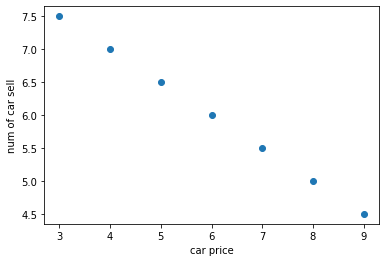

In [38]:
plt.scatter(car_prices_array, num_of_car_sell_array)
plt.xlabel('car price')
plt.ylabel('num of car sell')
plt.show()

In [40]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

lr = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [42]:
loss_list = []
iteration_num = 1000

for iteration in range(iteration_num):
    # optimizer 초기화
    optimizer.zero_grad()
    
    # foward 연산
    results = model(car_price_tensor)
    
    # loss 연산
    loss = mse(results, num_of_car_sell_tensor)
    
    # backward
    loss.backward()
    
    # optimizer update
    optimizer.step()
    
    loss_list.append(loss.data)
    
    if iteration % 50 == 0:
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 10.244344711303711
epoch 50, loss 8.646042823791504
epoch 100, loss 8.314297676086426
epoch 150, loss 7.995279788970947
epoch 200, loss 7.688500881195068
epoch 250, loss 7.393495082855225
epoch 300, loss 7.10980749130249
epoch 350, loss 6.837004661560059
epoch 400, loss 6.574671268463135
epoch 450, loss 6.322402000427246
epoch 500, loss 6.079811096191406
epoch 550, loss 5.846529960632324
epoch 600, loss 5.622199058532715
epoch 650, loss 5.4064764976501465
epoch 700, loss 5.199031352996826
epoch 750, loss 4.999545097351074
epoch 800, loss 4.807713031768799
epoch 850, loss 4.623242378234863
epoch 900, loss 4.445849895477295
epoch 950, loss 4.27526330947876


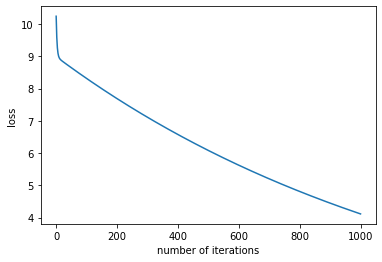

In [44]:
plt.plot(range(iteration_num), loss_list)
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.show()

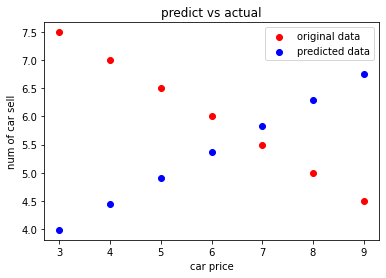

In [45]:
predict = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, num_of_car_sell_array, label='original data', color='red')
plt.scatter(car_prices_array, predict, label='predicted data', color='blue')

plt.legend()
plt.xlabel('car price')
plt.ylabel('num of car sell')
plt.title('predict vs actual')
plt.show()

In [90]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [91]:
train = pd.read_csv('../input/digit-recognizer/train.csv', dtype=np.float32)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values / 255 # 정규화

In [92]:
x_train, x_test, y_train, y_test = train_test_split(features_numpy,
                                                   targets_numpy,
                                                   test_size=0.2,
                                                   random_state=42)

In [93]:
features_train = torch.from_numpy(x_train)
targets_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [94]:
features_test = torch.from_numpy(x_test)
targets_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [95]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [96]:
train = torch.utils.data.TensorDataset(features_train, targets_train)
test = torch.utils.data.TensorDataset(features_test, targets_test)

In [97]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [98]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [99]:
input_dim = 28 * 28
output_dim = 10 # 0 ~ 9 숫자

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [100]:
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(train)
        
        loss = error(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28 * 28))
                
                outputs = model(test)
                
                predict = torch.max(outputs.data, 1)[1]
                
                total += len(labels)
                
                correct += (predict == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            
        if count % 500 == 0:
            print('iteration: {} loss: {} accuracy: {}%'.format(count, loss.data, accuracy))
        

iteration: 500 loss: 2.2910470962524414 accuracy: 11.678571701049805%
iteration: 1000 loss: 2.2650160789489746 accuracy: 21.10714340209961%
iteration: 1500 loss: 2.1907730102539062 accuracy: 34.7023811340332%
iteration: 2000 loss: 2.131880044937134 accuracy: 44.32143020629883%
iteration: 2500 loss: 2.0732195377349854 accuracy: 50.80952453613281%
iteration: 3000 loss: 2.0388150215148926 accuracy: 55.96428680419922%
iteration: 3500 loss: 1.988956093788147 accuracy: 59.85714340209961%
iteration: 4000 loss: 1.9394687414169312 accuracy: 62.80952453613281%
iteration: 4500 loss: 1.9410085678100586 accuracy: 65.01190185546875%
iteration: 5000 loss: 1.8812346458435059 accuracy: 66.89286041259766%
iteration: 5500 loss: 1.8409348726272583 accuracy: 68.36904907226562%
iteration: 6000 loss: 1.8531689643859863 accuracy: 69.66666412353516%
iteration: 6500 loss: 1.7595432996749878 accuracy: 70.83333587646484%
iteration: 7000 loss: 1.772761344909668 accuracy: 71.6547622680664%
iteration: 7500 loss: 1.7

Text(0.5, 1.0, 'loss vs num of iteration')

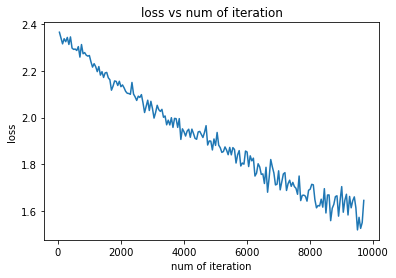

In [101]:
plt.plot(iteration_list, loss_list)
plt.xlabel('num of iteration')
plt.ylabel('loss')
plt.title('loss vs num of iteration')

In [112]:
class DNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DNNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.elu3(out)
        
        out = self.fc4(out)
        
        return out

In [113]:
input_dim = 28 * 28
hidden_dim = 150
output_dim = 10 # 0 ~ 9 숫자

model = DNNModel(input_dim, hidden_dim,output_dim)

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.002)

In [114]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 2.2937350273132324  Accuracy: 9.464285850524902 %
Iteration: 1000  Loss: 2.30183744430542  Accuracy: 9.5119047164917 %
Iteration: 1500  Loss: 2.3089497089385986  Accuracy: 9.607142448425293 %
Iteration: 2000  Loss: 2.2962958812713623  Accuracy: 9.702381134033203 %
Iteration: 2500  Loss: 2.290618419647217  Accuracy: 9.773809432983398 %
Iteration: 3000  Loss: 2.2955265045166016  Accuracy: 9.952381134033203 %
Iteration: 3500  Loss: 2.281953811645508  Accuracy: 10.214285850524902 %
Iteration: 4000  Loss: 2.2959988117218018  Accuracy: 10.464285850524902 %
Iteration: 4500  Loss: 2.2947728633880615  Accuracy: 10.880952835083008 %
Iteration: 5000  Loss: 2.281153917312622  Accuracy: 11.380952835083008 %
Iteration: 5500  Loss: 2.289128303527832  Accuracy: 11.7619047164917 %
Iteration: 6000  Loss: 2.291416883468628  Accuracy: 12.297618865966797 %
Iteration: 6500  Loss: 2.2925710678100586  Accuracy: 13.035714149475098 %
Iteration: 7000  Loss: 2.2773756980895996  Accuracy: 13.